## VGG16 Transfer Learning

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
cifar10 = keras.datasets.cifar10

(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))

In [4]:
import matplotlib.pyplot as plt

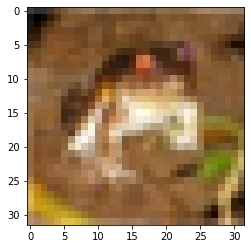

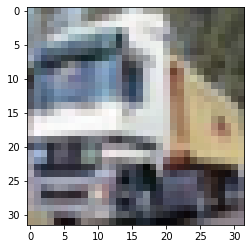

In [5]:
for image, label in train_dataset.take(2):
  plt.figure()
  plt.imshow(image)

In [6]:
IMG_SIZE = 180

In [7]:
def change_format(image, label):
  image = tf.cast(image, tf.float32)
  image = image/255.
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [8]:
train_dataset = train_dataset.map(change_format)
test_dataset = test_dataset.map(change_format)

In [9]:
train_dataset.element_spec

(TensorSpec(shape=(180, 180, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(1,), dtype=tf.uint8, name=None))

### VGG16 backbone

In [10]:
backbone = keras.applications.VGG16(include_top=False,
                                    weights='imagenet',
                                    input_shape=(180, 180, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [11]:
backbone.trainable = False

In [12]:
model = keras.Sequential()
model.add(backbone)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
train_dataset = train_dataset.shuffle(10000).batch(64)
test_dataset = test_dataset.batch(64)

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
782/782 [==============================] - 87s 111ms/step - loss: 1.1059 - accuracy: 0.6396
Epoch 2/10
782/782 [==============================] - 86s 110ms/step - loss: 0.7466 - accuracy: 0.7417
Epoch 3/10
782/782 [==============================] - 87s 111ms/step - loss: 0.6575 - accuracy: 0.7727
Epoch 4/10
782/782 [==============================] - 86s 109ms/step - loss: 0.5865 - accuracy: 0.7946
Epoch 5/10
782/782 [==============================] - 86s 110ms/step - loss: 0.5284 - accuracy: 0.8143
Epoch 6/10
782/782 [==============================] - 85s 109ms/step - loss: 0.4931 - accuracy: 0.8279
Epoch 7/10
782/782 [==============================] - 85s 109ms/step - loss: 0.4462 - accuracy: 0.8431
Epoch 8/10
782/782 [==============================] - 86s 110ms/step - loss: 0.4128 - accuracy: 0.8547
Epoch 9/10
782/782 [==============================] - 85s 109ms/step - loss: 0.3900 - accuracy: 0.8634
Epoch 10/10
782/782 [==============================] - 86s 109ms/step - l